#  UnSupervised Machine Learning
- UnSupervised Machine Learning works with unlabeled data.
- It is used to find patterns without predefined outputs.
  
## There are 3 Categories:
- Clustering
- Association Rule minig
- Dimension reduction

# 1 : Clustering
- Clustering Algorithms group similiar data points.
- The goal is to identify natural grouping in the data.

## Types of Clustering
- There are multiple types of Clustering based on methods:
- Centroid-based methods
- Distribution based
- connectivity based
- density based

# 1. Centroid-based methods
- Represented Clusters using central points
- K-means Clustering

# 2. Distribution based
- Guassian Mixture models(GMMs)

# 3. Connectivity based models
- Hiearhical clustering : Builds a tree like structure by merging or splitting clusters.

# 4. Density Based
- DBSCAN(Density Based):  they form clusters based on density.

# 2. Association Rule
-  Finding patterns between items in large datasets:
-  MBA( Market Basket Analysis) : if a person buys butter he may also buy bread.

# 3. Dimensionality Reduction
- Dimension Reduction means when we have a large dataset with too many features, that can cause issues like overfitting or low accuracy
- It helps in reducing the number of features while retaining our key info.

#  Clustering

## K - Means Clustering:  
- It is a unsupervised machine learning algorithm which groups unlabeled dataset into different clusters.
- It is used to organize data into groups based on their features ( Similarity)

In [1]:
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y_true = make_blobs(n_samples = 500, centers = 4, cluster_std = 0.60, random_state = 42)

In [4]:
X.shape

(500, 2)

In [5]:
y_true.shape

(500,)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

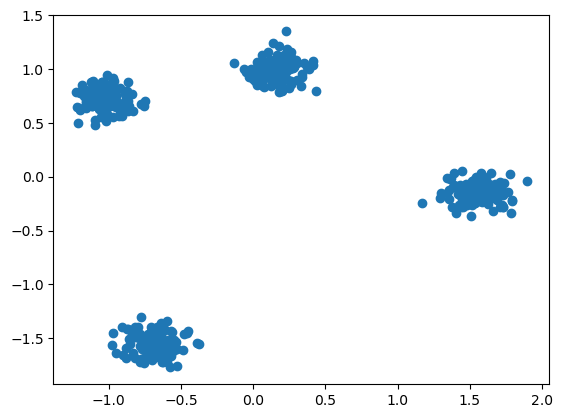

In [7]:
plt.scatter ( X_scaled[:, 0],X_scaled[:, 1])
plt.show()

# K-means clustering

In [8]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [9]:
kmeans.fit(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [11]:
labels = kmeans.labels_

In [12]:
centroids = kmeans.cluster_centers_

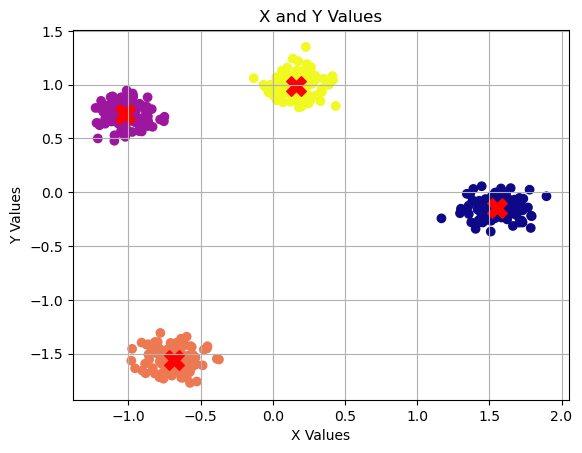

In [23]:
plt.scatter ( X_scaled[:, 0],X_scaled[:, 1], c = labels, cmap = 'plasma')
plt.scatter ( centroids[:, 0],centroids[:, 1], c = 'red', marker = "X", s = 200, label = 'centroids')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("X and Y Values")
plt.grid()
plt.show()

# Unsupervised ML
## Association Rule mining (e.g MBA (MARKET BASKET ANALYSIS)
### APRIORI ALGORITHM

In [9]:
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam', 'butter'],
    ['bread', 'jam']
]

In [28]:
data

[['milk', 'bread', 'butter'],
 ['bread', 'butter'],
 ['milk', 'bread'],
 ['milk', 'bread', 'jam', 'butter'],
 ['bread', 'jam']]

In [30]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 245.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 476.3 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 986.4 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 2.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.4 MB 2.6 MB/s eta 0:00:01
   -----------------------------

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam', 'butter'],
    ['bread', 'jam']
]

In [28]:
te =  TransactionEncoder()

In [29]:
te.ary= te.fit(data).transform(data)

In [30]:
df = pd.DataFrame(te.ary,columns = te.columns_)

In [31]:
df.head()

,bread,butter,jam,milk
0,True,True,False,True
1,True,True,False,False
2,True,False,False,True
3,True,True,True,True
4,True,False,True,False


In [32]:
df.isnull().sum()

bread     0
butter    0
jam       0
milk      0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bread   5 non-null      bool 
 1   butter  5 non-null      bool 
 2   jam     5 non-null      bool 
 3   milk    5 non-null      bool 
dtypes: bool(4)
memory usage: 152.0 bytes


In [34]:
df.columns

Index(['bread', 'butter', 'jam', 'milk'], dtype='object')

In [35]:
df.shape

(5, 4)

In [36]:
df.describe().T

,count,unique,top,freq
bread,5,1,True,5
butter,5,2,True,3
jam,5,2,False,3
milk,5,2,True,3


# Step 3
## Applying Apriori Algo to find frequent items

In [37]:
items = apriori(df,min_support = 0.6, use_colnames = True)

## Generating Association Rules 

In [38]:
rules = association_rules(items, metric = 'confidence', min_threshold = 0.7)

C:\Users\ASIF MANZOOR\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Show the rules

In [39]:
print(items)

   support         itemsets
0      1.0          (bread)
1      0.6         (butter)
2      0.6           (milk)
3      0.6  (butter, bread)
4      0.6    (milk, bread)


In [41]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.6,1.0,0.6,1.0,1.0,1.0,0.0,inf,0.0,0.6,0.0,0.8
1,(milk),(bread),0.6,1.0,0.6,1.0,1.0,1.0,0.0,inf,0.0,0.6,0.0,0.8


# UNSUPERVISED ALGORITHMS
## Association Rule mining (e.g MBA (MARKET BASKET ANALYSIS)
### APRIORI ALGORITHM ON Retail Dataset

## Step 1
## Importing Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2
## Imorting Dataset

In [45]:
data = pd.read_csv("online_retail.csv")

# Step 3
## Data Exploration 

In [47]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [48]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [51]:
data.shape

(541909, 8)

In [54]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [55]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Step 4
## Data Preprocessesing


In [58]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Home work
- remove missing values from Description column
- Drop CustomerID Column
- check again missing values
- Check for outliers
- plot outliers